# [How to Avoid a Bar Tab?](https://xpuzzlecorner.substack.com/p/can-you-survive-the-great-bar-crawl)
## March 23, 2025

## Problem

_After a weeks long bar crawl you and your friends are exhausted and have run up an enormous tab. Your bartender Alex—an avid puzzler himself—overhears your complaining and proposes a game that gives you all the chance to zero out your tab if you win. But if you lose, your tab doubles. The game goes as follows._

_You begin with a two card deck consisting of one red and one black card. On each turn:_

_1) You flip a fair coin. If it lands heads, you add a black card to the pile. If it lands tails, no new card is added._

_2) You shuffle the cards in the pile_

_3) You randomly select one card from the pile and observe it. If it’s red, the game is over. If its black, you return the card to the deck and go back step 1 repeating the process._

_Alex tells you that you need to make it a certain number of turns without drawing a red card in order to win. Before he tells you how many rounds you need to win, you first want to compute how long this game is expected to last so that you can tell whether you should take the bet or not. So the question for this week is:_

_How many turns is this game expected to last?_

## Solution

See the [writeup](https://xpuzzlecorner.substack.com/p/how-to-avoid-a-bar-tab-solution) for a written explination of the solution. 

In [5]:
import random
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
# np.random.seed(42)
# random.seed(42)
num_simulations = 100000

%matplotlib inline

Expected number of turns: 4.00
Median number of turns: 2.00
Standard deviation: 11.75
Minimum turns: 1
Maximum turns: 1961

Percentiles:
25th percentile: 1.00
50th percentile: 2.00
75th percentile: 4.00
95th percentile: 13.00


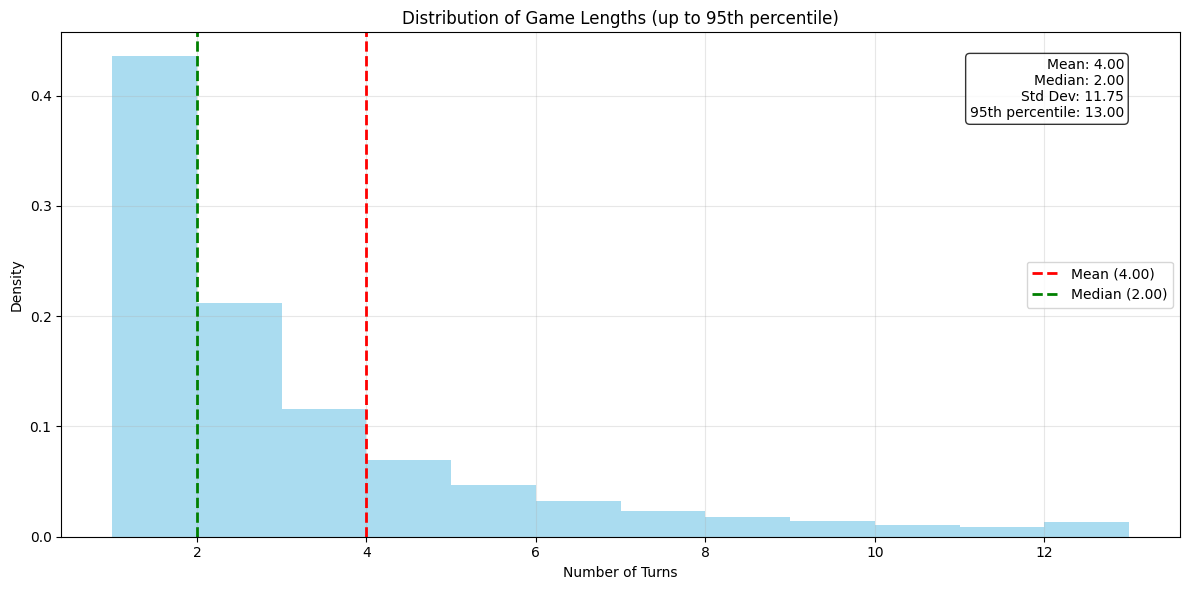

In [6]:
def simulate_bar_game(num_simulations: int = 10000) -> Tuple[float, np.ndarray]:
    """
    Simulates the bar game with a deck of red and black cards.
    
    Args:
        num_simulations (int): Number of times to simulate the game
        
    Returns:
        Tuple[float, np.ndarray]: Expected number of turns and array of all game lengths
    """
    game_lengths = np.zeros(num_simulations, dtype=np.int32)
    
    # Pre-generate random numbers for coin flips
    coin_flips = np.random.random(num_simulations * 100) < 0.5  # Estimate max turns
    flip_index = 0
    
    for sim in range(num_simulations):
        num_black = 1  # Start with one black card
        turns = 0
        
        while True:
            turns += 1
            
            # Add black card if heads (True)
            if coin_flips[flip_index]:
                num_black += 1
            flip_index += 1
            
            # Probability of drawing red card is 1/(num_black + 1)
            if np.random.random() < 1/(num_black + 1):
                game_lengths[sim] = turns
                break
                
    expected_turns = np.mean(game_lengths)
    return expected_turns, game_lengths

def analyze_results(expected_turns: float, game_lengths: np.ndarray) -> None:
    """
    Analyzes and prints statistics about the game simulations and displays a histogram.
    
    Args:
        expected_turns (float): Average number of turns
        game_lengths (np.ndarray): Array of all game lengths
    """
    # Print statistics
    print(f"Expected number of turns: {expected_turns:.2f}")
    print(f"Median number of turns: {np.median(game_lengths):.2f}")
    print(f"Standard deviation: {np.std(game_lengths):.2f}")
    print(f"Minimum turns: {np.min(game_lengths)}")
    print(f"Maximum turns: {np.max(game_lengths)}")
    
    # Calculate percentiles
    percentiles = np.percentile(game_lengths, [25, 50, 75, 95])
    print(f"\nPercentiles:")
    print(f"25th percentile: {percentiles[0]:.2f}")
    print(f"50th percentile: {percentiles[1]:.2f}")
    print(f"75th percentile: {percentiles[2]:.2f}")
    print(f"95th percentile: {percentiles[3]:.2f}")
    
    # Filter data to 95th percentile for plotting
    upper_limit = percentiles[3]
    filtered_data = game_lengths[game_lengths <= upper_limit]
    
    # Create histogram
    plt.figure(figsize=(12, 6))
    plt.hist(filtered_data, bins='auto', density=True, alpha=0.7, color='skyblue')
    plt.axvline(expected_turns, color='red', linestyle='dashed', linewidth=2, label=f'Mean ({expected_turns:.2f})')
    plt.axvline(np.median(game_lengths), color='green', linestyle='dashed', linewidth=2, label=f'Median ({np.median(game_lengths):.2f})')
    
    # Add labels and title
    plt.xlabel('Number of Turns')
    plt.ylabel('Density')
    plt.title('Distribution of Game Lengths (up to 95th percentile)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add text box with statistics
    stats_text = (f'Mean: {expected_turns:.2f}\n'
                 f'Median: {np.median(game_lengths):.2f}\n'
                 f'Std Dev: {np.std(game_lengths):.2f}\n'
                 f'95th percentile: {upper_limit:.2f}')
    plt.text(0.95, 0.95, stats_text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()


expected_turns, game_lengths = simulate_bar_game(num_simulations)
analyze_results(expected_turns, game_lengths)


Expected number of turns: 71.07
Median number of turns: 2.00
Standard deviation: 12578.39
Minimum turns: 1
Maximum turns: 3932804

Percentiles:
25th percentile: 1.00
50th percentile: 2.00
75th percentile: 6.00
95th percentile: 38.00


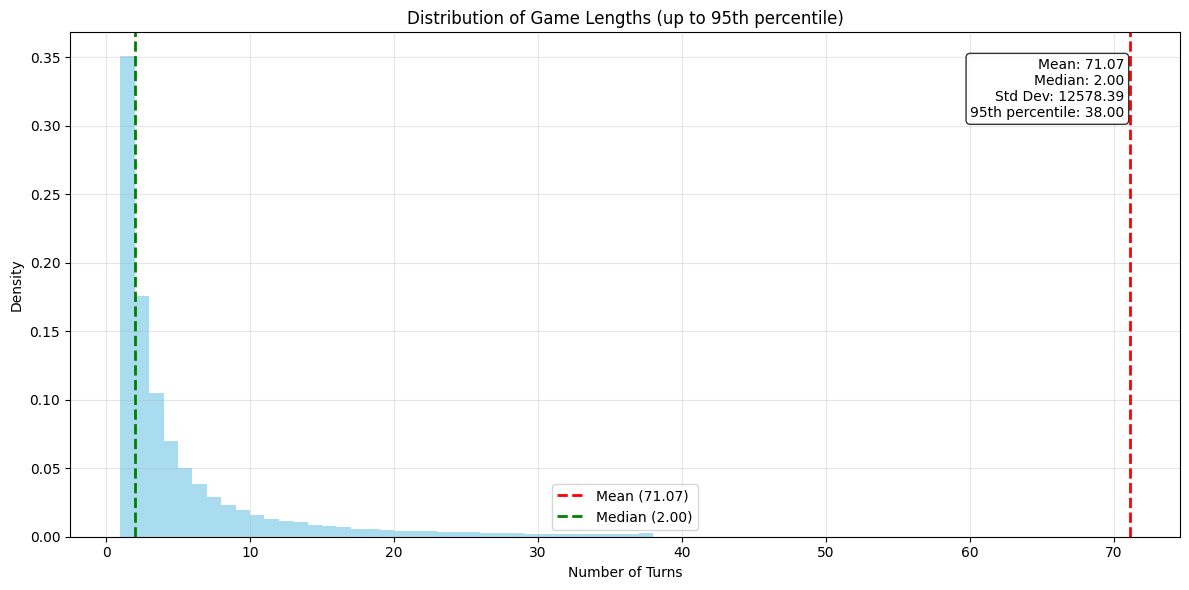

In [12]:
def simulate_bar_game_deterministic(num_simulations: int = 10000) -> Tuple[float, np.ndarray]:
    """
    Simulates the bar game with a deck of red and black cards,
    adding one black card deterministically each turn.
    
    Args:
        num_simulations (int): Number of times to simulate the game
        
    Returns:
        Tuple[float, np.ndarray]: Expected number of turns and array of all game lengths
    """
    game_lengths = np.zeros(num_simulations, dtype=np.int32)
    
    for sim in range(num_simulations):
        num_black = 1  # Start with one black card
        turns = 0
        
        while True:
            turns += 1
            
            # Add black card deterministically
            num_black += 1
            
            # Probability of drawing red card is 1/(num_black + 1)
            if np.random.random() < 1/(num_black + 1):
                game_lengths[sim] = turns
                break
                
    expected_turns = np.mean(game_lengths)
    return expected_turns, game_lengths

expected_turns, game_lengths = simulate_bar_game_deterministic(num_simulations)
analyze_results(expected_turns, game_lengths)